# Vorticity Budget closure in MOM6
*Contributors:* [Hemant Khatri](https://github.com/hmkhatri), [Stephen Griffies](https://github.com/StephenGriffies)

Here, we outline an approach to analyze the vorticity budget using depth-averaged momentum budget terms, which are described above. 

## Governing equations

We utilize the depth-averaged momentum budget terms for diagnosing the vorticity budget terms. The barotropic momentum equation is, 

\begin{equation}
\frac{\partial \overline{\mathbf{u}}}{\partial t} = -\sum_{k}(h_k/H)\left(\left[ \dfrac{f + \zeta_k}{h_k} \right] \mathbf{\hat{z}} \wedge (h_k \, \mathbf{u}_k)+ \nabla_{s}K_k \right) -\sum_{k} (h_k/H) \left(\left[ \rho^{-1} \, \nabla_s \, p_k + \nabla_s \Phi_k \right] \right) + \sum_{k} (h_k/H) \boldsymbol{F}_k^{{\text{horz frict}}} + \sum_{k} (h_k/H) \left( \boldsymbol{F}_k^{{\text{vert frict}}} + \rho^{-1} \, \boldsymbol{\tau}_k^{\text{bound}} \right)+ \text{Residual}
\end{equation}

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from xgcm import Grid
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import glob, os

from dask.distributed import Client
from dask.distributed import LocalCluster
cluster = LocalCluster()
client = Client(cluster)

In [2]:
# Functions for plotting

def plot_map(ax, da, vmin=-999, vmax=999, vstep=1,
             lon='geolon', lat='geolat', cmap='RdBu_r', title='what is it?'):
    
    contours = np.arange(vmin, vmax+vstep, vstep)
    
    p = da.plot(ax=ax, x=lon, y=lat, vmin=vmin, vmax=vmax, cmap=cmap, 
                transform=ccrs.PlateCarree(), add_labels=False, add_colorbar=False)
    
    # add separate colorbar
    cb = plt.colorbar(p, ax=ax, format='%.1e', extend='both', shrink=0.6)
    cb.ax.tick_params(labelsize=12)

    p.axes.gridlines(color='black', alpha=0.5, linestyle='--')
    
    _ = plt.title(title, fontsize=14)
    return fig

In [3]:
ds = xr.open_dataset("/work/Hemant.Khatri/MOM6_idealised/MOM_budget/OM125_monthly.nc")

ds

<xarray.Dataset>
Dimensions:           (nv: 2, xh: 2880, xq: 2880, yh: 2240, yq: 2240)
Coordinates:
  * nv                (nv) float64 1.0 2.0
    time              object ...
  * xq                (xq) float64 -298.5 -298.4 -298.3 ... 61.12 61.23 61.35
  * yh                (yh) float64 -83.62 -83.58 -83.54 ... 89.86 89.92 89.97
  * xh                (xh) float64 -298.6 -298.5 -298.4 ... 61.05 61.16 61.28
  * yq                (yq) float64 -83.6 -83.56 -83.52 ... 89.89 89.95 90.0
    geolat            (yh, xh) float32 ...
    geolat_c          (yq, xq) float32 ...
    geolat_u          (yh, xq) float32 ...
    geolat_v          (yq, xh) float32 ...
    geolon            (yh, xh) float32 ...
    geolon_c          (yq, xq) float32 ...
    geolon_u          (yh, xq) float32 ...
    geolon_v          (yq, xh) float32 ...
Data variables:
    average_DT        timedelta64[ns] ...
    average_T1        object ...
    average_T2        object ...
    hf_CAu_2d         (yh, xq) float32 ...
    time_bnds         (nv) object ...
    hf_CAv_2d         (yq, xh) float32 ...
    hf_PFu_2d         (yh, xq) float32 ...
    hf_PFv_2d         (yq, xh) float32 ...
    hf_diffu_2d       (yh, xq) float32 ...
    hf_diffv_2d       (yq, xh) float32 ...
    hf_du_dt_visc_2d  (yh, xq) float32 ...
    hf_dudt_2d        (yh, xq) float32 ...
    hf_dv_dt_visc_2d  (yq, xh) float32 ...
    hf_dvdt_2d        (yq, xh) float32 ...
    hf_gKEu_2d        (yh, xq) float32 ...
    hf_gKEv_2d        (yq, xh) float32 ...
    hf_rvxu_2d        (yq, xh) float32 ...
    hf_rvxv_2d        (yh, xq) float32 ...
    hf_u_BT_accel_2d  (yh, xq) float32 ...
    hf_v_BT_accel_2d  (yq, xh) float32 ...
    pbo               (yh, xh) float32 ...
    taux              (yh, xq) float32 ...
    taux_bot          (yh, xq) float32 ...
    tauy              (yq, xh) float32 ...
    tauy_bot          (yq, xh) float32 ...
    ubt_dt            (yh, xq) float32 ...
    vbt_dt            (yq, xh) float32 ...
    Coriolis          (yq, xq) float32 ...
    areacello         (yh, xh) float32 ...
    areacello_bu      (yq, xq) float32 ...
    areacello_cu      (yh, xq) float32 ...
    areacello_cv      (yq, xh) float32 ...
    deptho            (yh, xh) float32 ...
    dxCu              (yh, xq) float32 ...
    dxCv              (yq, xh) float32 ...
    dxt               (yh, xh) float32 ...
    dyCu              (yh, xq) float32 ...
    dyCv              (yq, xh) float32 ...
    dyt               (yh, xh) float32 ...
    hfgeou            (yh, xh) float32 ...
    sftof             (yh, xh) float32 ...
    wet               (yh, xh) float32 ...
    wet_c             (yq, xq) float32 ...
    wet_u             (yh, xq) float32 ...
    wet_v             (yq, xh) float32 ...
    basin             (yh, xh) float32 ...

In [33]:
# Take curl of depth-averaged momentum budget terms

grid = Grid(ds, coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'} }, periodic=['X'])

dzeta_dt = ( - grid.diff(ds['hf_dudt_2d']/ds['dyCu'], 'Y', boundary='fill')
            + grid.diff(ds['hf_dvdt_2d']/ds['dxCv'], 'X', boundary='fill') )
dzeta_dt = dzeta_dt.assign_coords({'geolat_c': ds['geolat_c'], 'geolon_c': ds['geolon_c']})

zeta_CA = ( - grid.diff(ds['hf_CAu_2d']/ds['dyCu'], 'Y', boundary='fill')
           + grid.diff(ds['hf_CAv_2d']/ds['dxCv'], 'X', boundary='fill') )
zeta_CA = zeta_CA.assign_coords({'geolat_c': ds['geolat_c'], 'geolon_c': ds['geolon_c']})

zeta_K = ( - grid.diff(ds['hf_gKEu_2d']/ds['dyCu'], 'Y', boundary='fill')
           + grid.diff(ds['hf_gKEv_2d']/ds['dxCv'], 'X', boundary='fill') )
zeta_K = zeta_K.assign_coords({'geolat_c': ds['geolat_c'], 'geolon_c': ds['geolon_c']})

zeta_rv = ( - grid.diff(ds['hf_rvxv_2d']/ds['dyCu'], 'Y', boundary='fill')
           + grid.diff(ds['hf_rvxu_2d']/ds['dxCv'], 'X', boundary='fill') )
zeta_rv = zeta_rv.assign_coords({'geolat_c': ds['geolat_c'], 'geolon_c': ds['geolon_c']})

zeta_PF = ( - grid.diff(ds['hf_PFu_2d']/ds['dyCu'], 'Y', boundary='fill')
           + grid.diff(ds['hf_PFv_2d']/ds['dxCv'], 'X', boundary='fill') ) 
zeta_PF = zeta_PF.assign_coords({'geolat_c': ds['geolat_c'], 'geolon_c': ds['geolon_c']})

zeta_diff = ( - grid.diff(ds['hf_diffu_2d']/ds['dyCu'], 'Y', boundary='fill')
             + grid.diff(ds['hf_diffv_2d']/ds['dxCv'], 'X', boundary='fill') )
zeta_diff = zeta_diff.assign_coords({'geolat_c': ds['geolat_c'], 'geolon_c': ds['geolon_c']})

zeta_visc = ( - grid.diff(ds['hf_du_dt_visc_2d']/ds['dyCu'], 'Y', boundary='fill')
             + grid.diff(ds['hf_dv_dt_visc_2d']/ds['dxCv'], 'X', boundary='fill') )
zeta_visc = zeta_visc.assign_coords({'geolat_c': ds['geolat_c'], 'geolon_c': ds['geolon_c']})

zeta_BT_accel = ( - grid.diff(ds['hf_u_BT_accel_2d']/ds['dyCu'], 'Y', boundary='fill')
                 + grid.diff(ds['hf_v_BT_accel_2d']/ds['dxCv'], 'X', boundary='fill') )
zeta_BT_accel = zeta_BT_accel.assign_coords({'geolat_c': ds['geolat_c'], 'geolon_c': ds['geolon_c']})

dzetabt_dt = ( - grid.diff(ds['ubt_dt']/ds['dyCu'], 'Y', boundary='fill')
            + grid.diff(ds['vbt_dt']/ds['dxCv'], 'X', boundary='fill') )
dzetabt_dt = dzetabt_dt.assign_coords({'geolat_c': ds['geolat_c'], 'geolon_c': ds['geolon_c']})

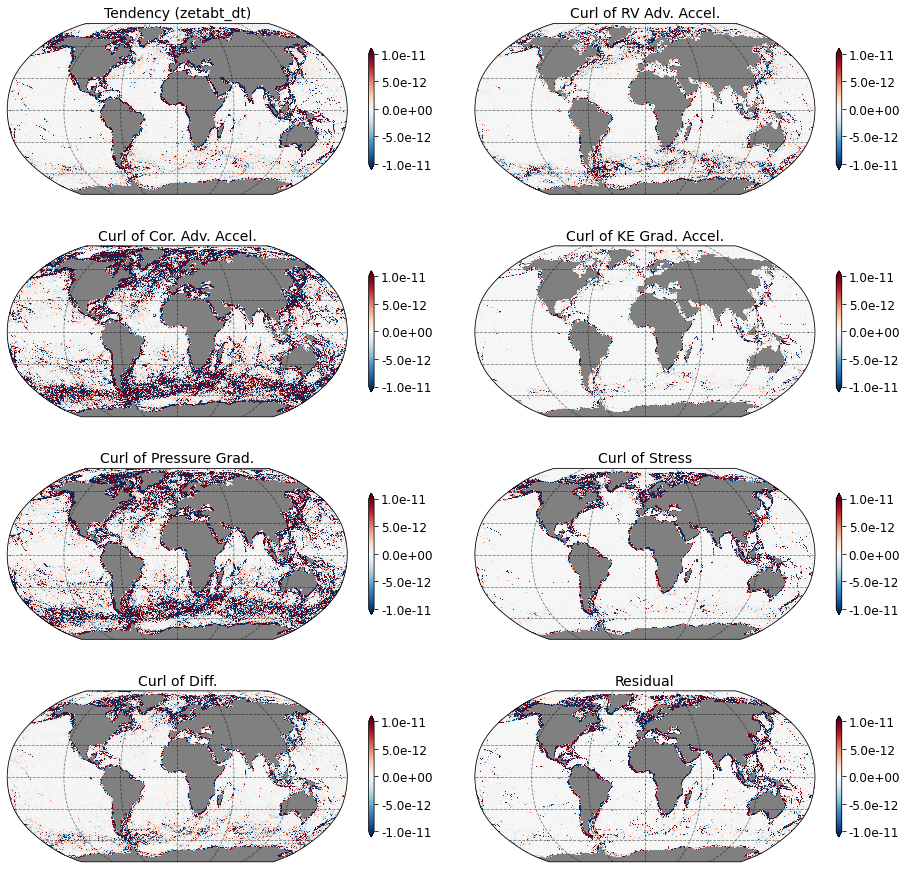

In [38]:
max_r = 1.e-11

grid = plt.GridSpec(4, 2, wspace=0.1, hspace=0.1)
fig = plt.figure(figsize=[16,16])

ax = fig.add_subplot(grid[0, 0], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_map(ax, dzetabt_dt.isel(yq=slice(0,2239)), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title='Tendency (zetabt_dt)')

ax = fig.add_subplot(grid[0, 1], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_map(ax, zeta_rv.isel(yq=slice(0,2239)), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title='Curl of RV Adv. Accel.')

ax = fig.add_subplot(grid[1, 0], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_map(ax, (zeta_CA-zeta_K-zeta_rv).isel(yq=slice(0,2239)), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title='Curl of Cor. Adv. Accel.')

ax = fig.add_subplot(grid[1, 1], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_map(ax, zeta_K.isel(yq=slice(0,2239)), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title='Curl of KE Grad. Accel.')

ax = fig.add_subplot(grid[2, 0], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_map(ax, (zeta_PF+zeta_BT_accel).isel(yq=slice(0,2239)), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title='Curl of Pressure Grad.')

ax = fig.add_subplot(grid[2, 1], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_map(ax, zeta_visc.isel(yq=slice(0,2239)), vmin=-max_r, vmax=max_r, vstep=2.e-1*max_r,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title='Curl of Stress')

ax = fig.add_subplot(grid[3, 0], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_map(ax, zeta_diff.isel(yq=slice(0,2239)), vmin=-max_r, vmax=max_r, vstep=2.e-1*max_r,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title='Curl of Diff.')

tmp = dzetabt_dt - zeta_CA - zeta_PF - zeta_BT_accel - zeta_visc - zeta_diff
ax = fig.add_subplot(grid[3, 1], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_map(ax, tmp.isel(yq=slice(0,2239)), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title='Residual')

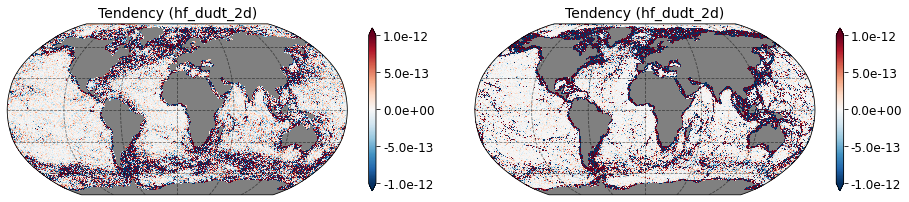

In [37]:
grid = plt.GridSpec(1, 2, wspace=0.1, hspace=0.1)
fig = plt.figure(figsize=[16,5])

max_r = 1.e-10

ax = fig.add_subplot(grid[0, 0], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_map(ax, dzeta_dt.isel(yq=slice(0,2239)), vmin=-1e-2*max_r, vmax=1e-2*max_r, vstep=2.e-3*max_r,
             lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title='Tendency (hf_dudt_2d)')

ax = fig.add_subplot(grid[0, 1], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_map(ax, (dzetabt_dt - dzeta_dt).isel(yq=slice(0,2239)), vmin=-1e-2*max_r, vmax=1e-2*max_r, vstep=2.e-3*max_r,
             lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title='Tendency (hf_dudt_2d)')

In [39]:
ds.close()
client.close()
cluster.close()